In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
from survival_models import create_imagenet_model
from tf_dataset_binary import get_datagenerator
import glob
import random
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
import numpy as np

In [4]:
images = list(glob.glob("./tiles-TCGA-normalized/*/*.png"))
clinical_vars = [[1, 2, 3] for i in range(len(images))]
labels = [random.random() > 0.5 for i in range(len(images))]

ds = get_datagenerator(images, clinical_vars, labels, batch_size=10, train=True, imagenet=False)

In [5]:
(imgs, clin), y = next(iter(ds.take(1)))

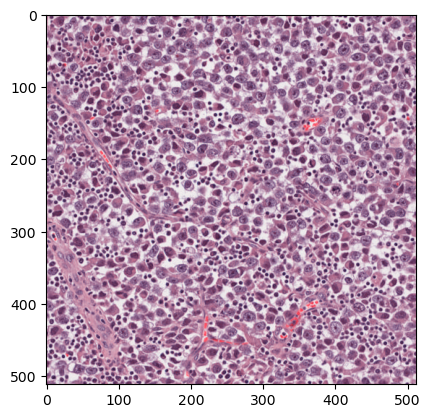

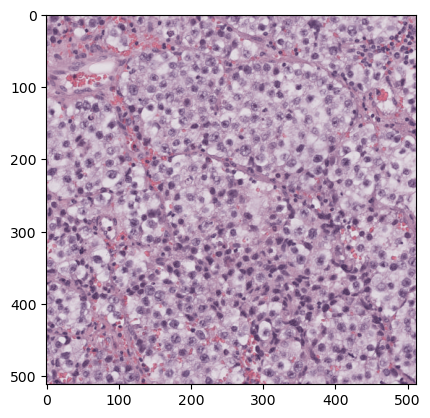

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


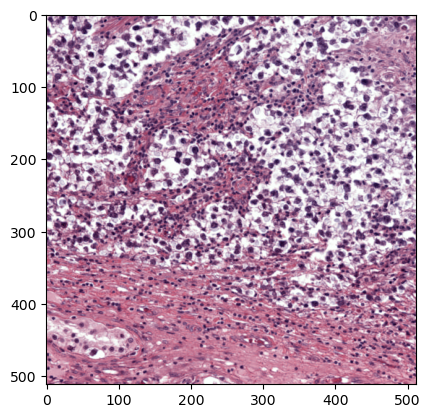

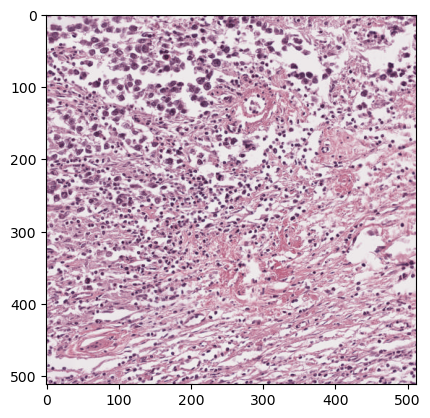

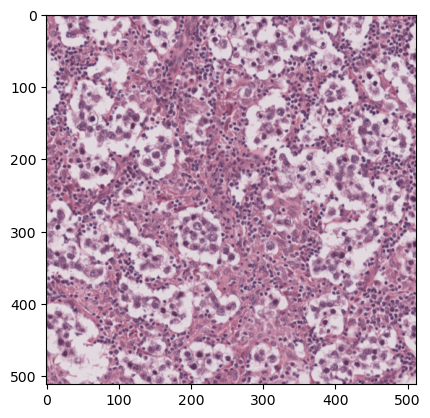

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


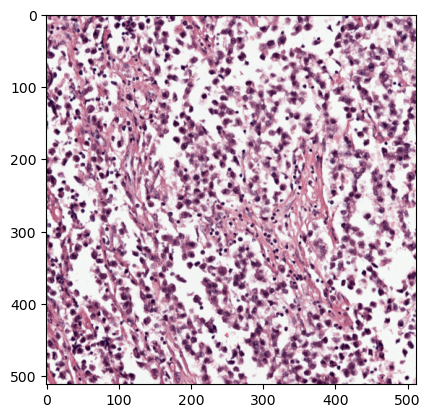

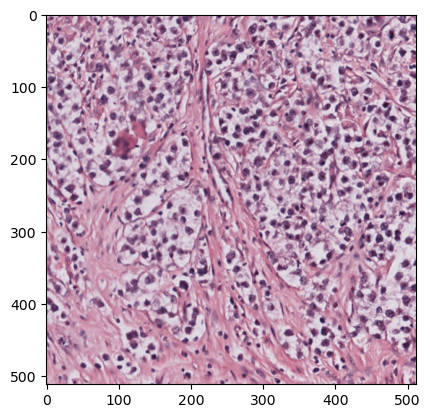

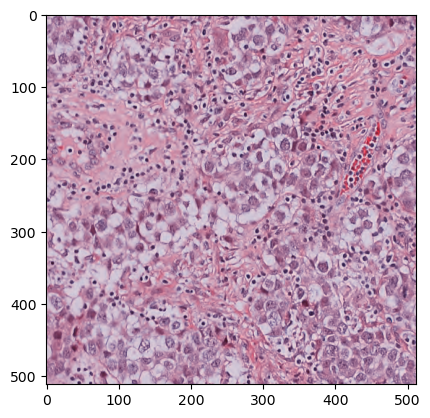

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


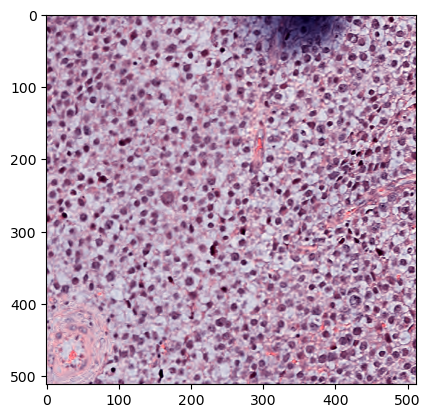

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


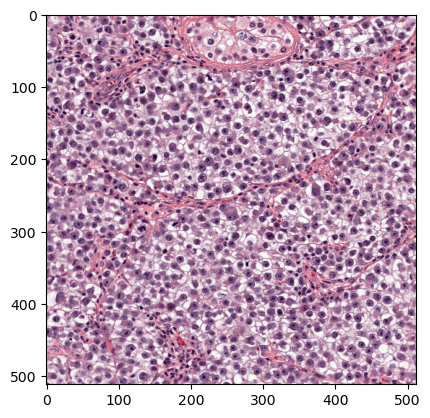

In [6]:
for img in imgs:
    plt.imshow(img)
    plt.show()

In [9]:
imgs[0].numpy().max()

0.9888947

In [ ]:
image_input = layers.Input((224, 224, 3), name='input')
# clinical_input = layers.Input(shape=(num_clinical_features,), name='clinical_input')

resnet = ResNet50(input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet')
resnet.trainable = False

global_average_layer = layers.GlobalAveragePooling2D()

x = layers.BatchNormalization()(image_input)
x = resnet(x, training=False)
x = global_average_layer(x)

feature_extractor = tf.keras.Model(inputs=image_input, outputs=x)

In [ ]:
feature_extractor.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 batch_normalization_2 (Bat  (None, 224, 224, 3)       12        
 chNormalization)                                                
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_9  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
Total params: 23587724 (89.98 MB)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 23587718 (89.98 MB)
_________________________________________________________________


In [ ]:
feat_vec = feature_extractor(np.expand_dims(imgs[0], 0))

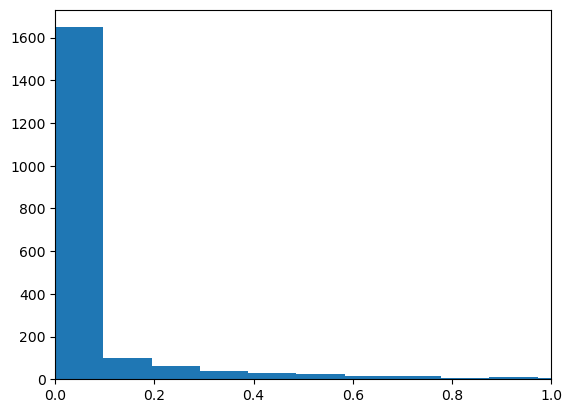

In [ ]:
plt.hist(feat_vec.numpy().flatten(), bins=100)
plt.xlim(0, 1)
plt.show()

In [ ]:
feat_vec.numpy()

array([[0.43644375, 0.06539191, 0.03509546, ..., 0.        , 0.        ,
        0.15494412]], dtype=float32)